In [1]:
# Importing the Panda DataFrame libraries

import warnings
warnings.filterwarnings('ignore')
import os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime 
import seaborn as sns

In [2]:
# Loading data into the DataFrame and view the first five rows to know what the dataset looks like
# note that the file columns are separated by tabs instead of commas (\t).

df_mkt = pd.read_csv('marketing_campaign.csv', sep='\t')
df_mkt.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

### Descriptive Statistics 
* Checking to see some first observations through the statistical description

In [3]:
df_mkt.shape

(2240, 29)

In [4]:
df_mkt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df_mkt.describe()

ID   Year_Birth         Income      Kidhome     Teenhome  \
count   2240.000000  2240.000000    2216.000000  2240.000000  2240.000000   
mean    5592.159821  1968.805804   52247.251354     0.444196     0.506250   
std     3246.662198    11.984069   25173.076661     0.538398     0.544538   
min        0.000000  1893.000000    1730.000000     0.000000     0.000000   
25%     2828.250000  1959.000000   35303.000000     0.000000     0.000000   
50%     5458.500000  1970.000000   51381.500000     0.000000     0.000000   
75%     8427.750000  1977.000000   68522.000000     1.000000     1.000000   
max    11191.000000  1996.000000  666666.000000     2.000000     2.000000   

           Recency     MntWines    MntFruits  MntMeatProducts  \
count  2240.000000  2240.000000  2240.000000      2240.000000   
mean     49.109375   303.935714    26.302232       166.950000   
std      28.962453   336.597393    39.773434       225.715373   
min       0.000000     0.000000     0.000000         0.000000   
25%      24.000000    23.750000     1.000000        16.000000   
50%      49.000000   173.500000     8.000000        67.000000   
75%      74.000000   504.250000    33.000000       232.000000   
max      99.000000  1493.000000   199.000000      1725.000000   

       MntFishProducts  ...  NumWebVisitsMonth  AcceptedCmp3  AcceptedCmp4  \
count      2240.000000  ...        2240.000000   2240.000000   2240.000000   
mean         37.525446  ...           5.316518      0.072768      0.074554   
std          54.628979  ...           2.426645      0.259813      0.262728   
min           0.000000  ...           0.000000      0.000000      0.000000   
25%           3.000000  ...           3.000000      0.000000      0.000000   
50%          12.000000  ...           6.000000      0.000000      0.000000   
75%          50.000000  ...           7.000000      0.000000      0.000000   
max         259.000000  ...          20.000000      1.000000      1.000000   

       AcceptedCmp5  AcceptedCmp1  AcceptedCmp2     Complain  Z_CostContact  \
count   2240.000000   2240.000000   2240.000000  2240.000000         2240.0   
mean       0.072768      0.064286      0.013393     0.009375            3.0   
std        0.259813      0.245316      0.114976     0.096391            0.0   
min        0.000000      0.000000      0.000000     0.000000            3.0   
25%        0.000000      0.000000      0.000000     0.000000            3.0   
50%        0.000000      0.000000      0.000000     0.000000            3.0   
75%        0.000000      0.000000      0.000000     0.000000            3.0   
max        1.000000      1.000000      1.000000     1.000000            3.0   

       Z_Revenue     Response  
count     2240.0  2240.000000  
mean        11.0     0.149107  
std          0.0     0.356274  
min         11.0     0.000000  
25%         11.0     0.000000  
50%         11.0     0.000000  
75%         11.0     0.000000  
max         11.0     1.000000  

[8 rows x 26 columns]

### Some of the first Observations are as follows;
* There are 2240 observations and 29 variables
* There are 3 object type variables ('Education','Marital_Status','Dt_Customer'), and rest are all numerical Variables
* There are some missing values and outliers, these will be explore more during out Data Processing stage.

### Data Processing

In [7]:
# Check for missing values 

df_mkt.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

### There are 24 Null values in the Income variable.

[Text(0.5, 0, 'Income'),
 Text(0, 0.5, 'Distribution'),
 Text(0.5, 1.0, 'Income Distribution Histogram')]

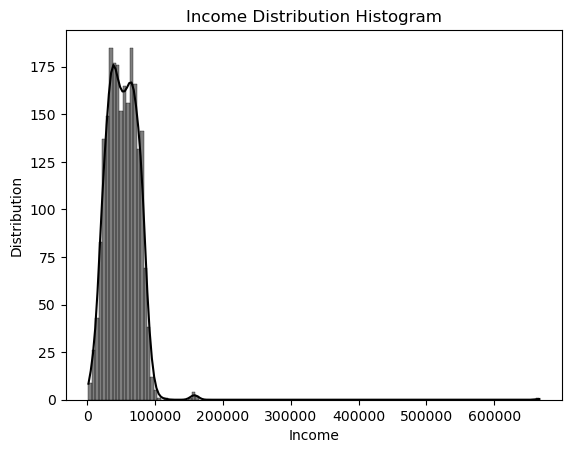

In [8]:
# Visualizing the Income variable to know how sweked the distribution is, this will give us the right treatment to the null values.

In = sns.histplot(df_mkt.Income, kde = True, color='black')
In.set(xlabel='Income' , ylabel='Distribution' , title='Income Distribution Histogram')

In [9]:
# Scaling the Income variable to see percentage of missing values.

#calculting isnull() % for 'Income'
df_mkt[df_mkt['Income'].isnull()].shape[0]* 100 / len(df_mkt)

1.0714285714285714

* From the observations above through histogram visualization, the distribution is bimodal distribution, so it is not highly skewed.
* The percentage of the missing data is relatively small at 1% and also the variable is a numeric variable.
* It is safe to treat our null with average replacement using mean. Because the missing data is missing completely at random.

In [10]:
# To treat the NA values, we will fill these with mean

df_mkt['Income'].fillna(df_mkt['Income'].mean(), inplace=True)

# Need to change Income unit to 1k
df_mkt['Income'] = df_mkt['Income']/1000

In [11]:
# Checking for duplicates 

df_mkt.duplicated().sum()

0

In [12]:
# Checking further to see the unique values of each variable, which might affects the efficiency of classification algorithms.

unique_counts = df_mkt.nunique()

print(unique_counts)

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1975
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64


In [13]:
# From the unique value above, we will choose the relevant variables we needed for our Classification Machine models.
# Drop constant columns which are Z_CostContact & Z_Revenue.
df_mkt.drop(['Z_CostContact', 'Z_Revenue'], axis=1, inplace=True)

# Drop User ID & Dt_Customer because they both irrelevant to the model.
df_mkt.drop(['ID', 'Dt_Customer'], axis=1, inplace=True) 

In [14]:
# Change Year_Birth to Age so as to be able to work more easily with our dataset.
df_mkt['Age'] = 2023 - df_mkt.Year_Birth.to_numpy()

# drop Year_Birth as we won't need it anymore since we have the Age variable of each customer.
df_mkt.drop('Year_Birth', axis=1, inplace=True)

### Obervations going forward 
* There are too many values for Education and Marital status which are relevant variables for our classification model.
* This will affect the classification algorithms, so merging some categories of the values.
* First check the value check and merge where necessary.

In [15]:
# Value count for Education
df_mkt['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [16]:
# There are five different values of Education, merging into the three classes of Education 
df_mkt['Education'].replace(['2n Cycle', 'Graduation'], ['Master', 'Bachelor'], inplace=True)

In [17]:
# Value count for Marital Status
df_mkt['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [18]:
# There are too many maritial status. Alone, Adsurd and YOLO will be replaced by Single.

df_mkt['Marital_Status'] = df_mkt['Marital_Status'].replace(['Alone','YOLO','Absurd'],'Single')

#### Checking for Outliers in our numeric variables.
* From the descriptive statistics above, observed an outlier in Income, will visualize Income variable to use graph to determine that outlier.
* Will also visulize the new column 'Age' as that was not included in the descriptive statistics above to ascertain if there is an outlier in there also.

<Axes: xlabel='Age'>

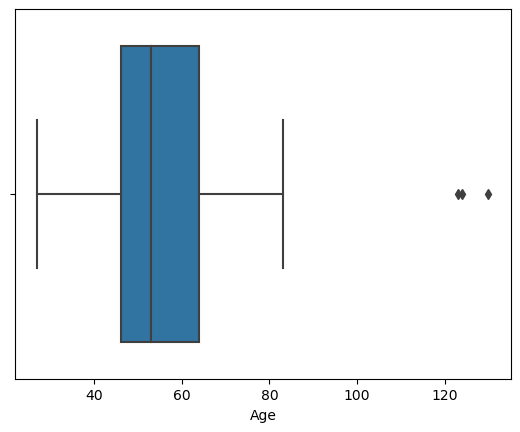

In [19]:
sns.boxplot(x=df_mkt["Age"])

<Axes: xlabel='Income'>

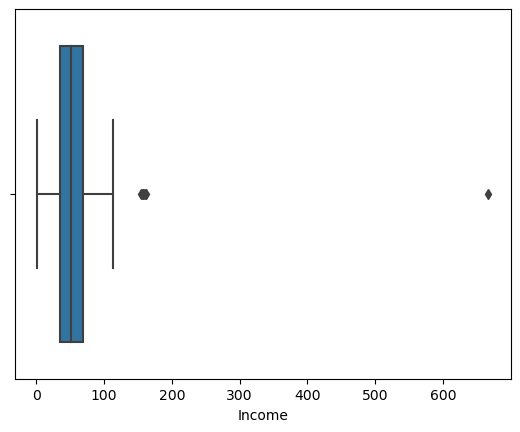

In [20]:
sns.boxplot(x=df_mkt["Income"])

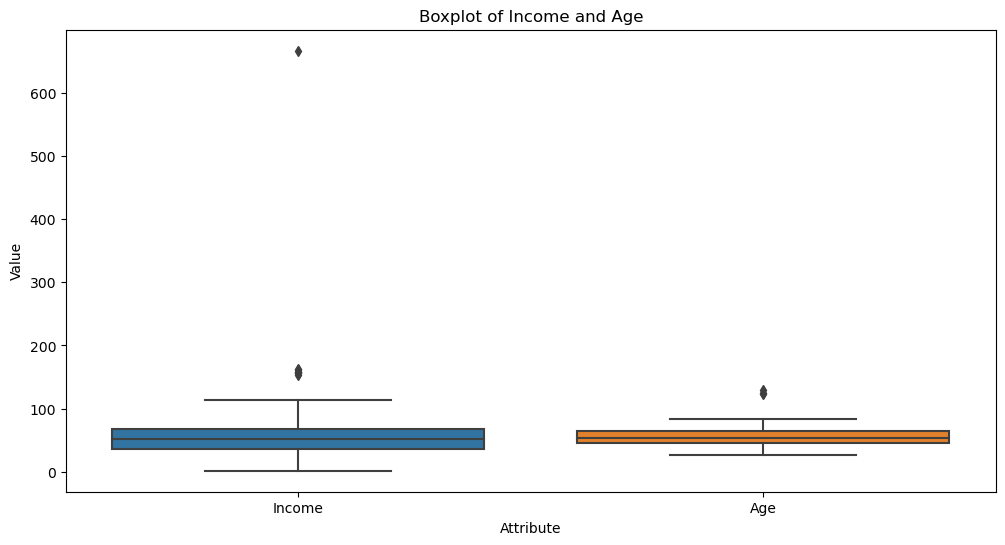

In [21]:
# Visualize outliers using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mkt[['Income', 'Age']])
plt.title('Boxplot of Income and Age')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.show()

### Observation
* There are outliers in Income and Age. We will treat the outliers by zscores and rectifying the outliers by capping to make sure our values do not go too low or too high to give us more accurate results in our analysis going forward.

In [23]:
from scipy.stats import zscore 

In [24]:
# Removing outliers using Z-score
z_scores = zscore(df_mkt[['Income', 'Age']])
threshold = 3
outliers = (np.abs(z_scores) > threshold).any(axis=1)
df_mkt = df_mkt[~outliers]

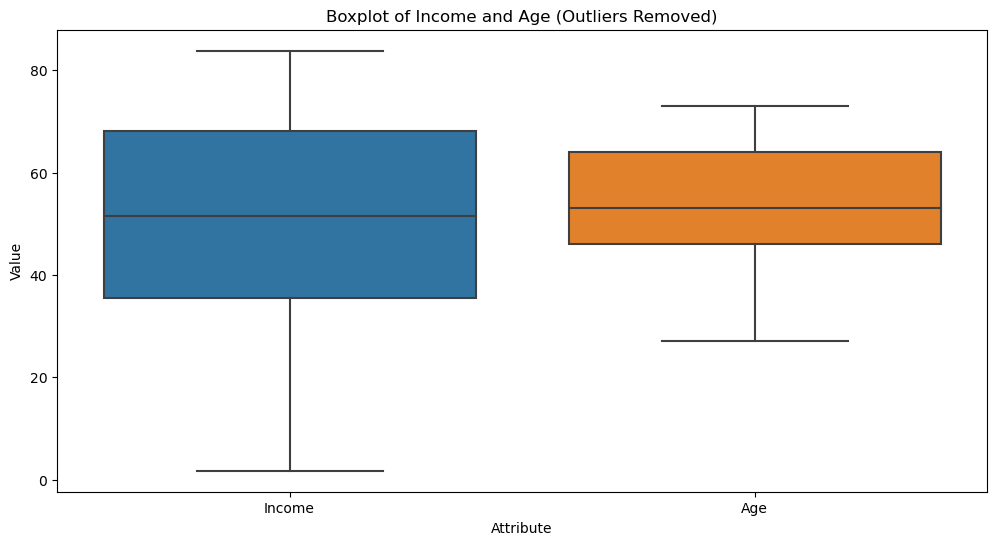

In [27]:
# Visualize outliers removed using box plots
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_mkt[['Income', 'Age']])
plt.title('Boxplot of Income and Age (Outliers Removed)')
plt.xlabel('Attribute')
plt.ylabel('Value')
plt.show()

In [26]:
# Rectify outliers by capping
# Capping outliers in 'Income'
income_cap = df_mkt['Income'].quantile(0.95)
df_mkt.loc[df_mkt['Income'] > income_cap, 'Income'] = income_cap

# Capping outliers in 'Age'
age_cap = df_mkt['Age'].quantile(0.95)
df_mkt.loc[df_mkt['Age'] > age_cap, 'Age'] = age_cap

## Exploratory Analysis

Text(0, 0.5, 'Frequency')

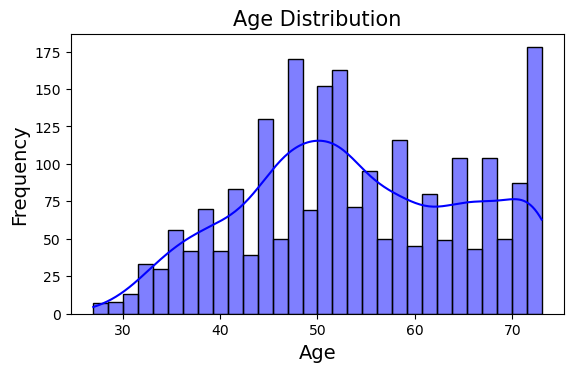

In [32]:
# visualizing Age distribution
plt.figure(figsize=(14, 8))
plt.subplot(2, 2, 1)
sns.histplot(df_mkt['Age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution', fontsize=15, color='black')
plt.xlabel('Age', fontsize=14, color="black")
plt.ylabel('Frequency', fontsize=14, color="black")

* From the Distribution above, the age of the customers are mainly centered in their 40s or 60s, the young people under 30s and elderly above 70s are very few.
* These people are at their middle ages or old ages, so their family condition should be further taken care of.

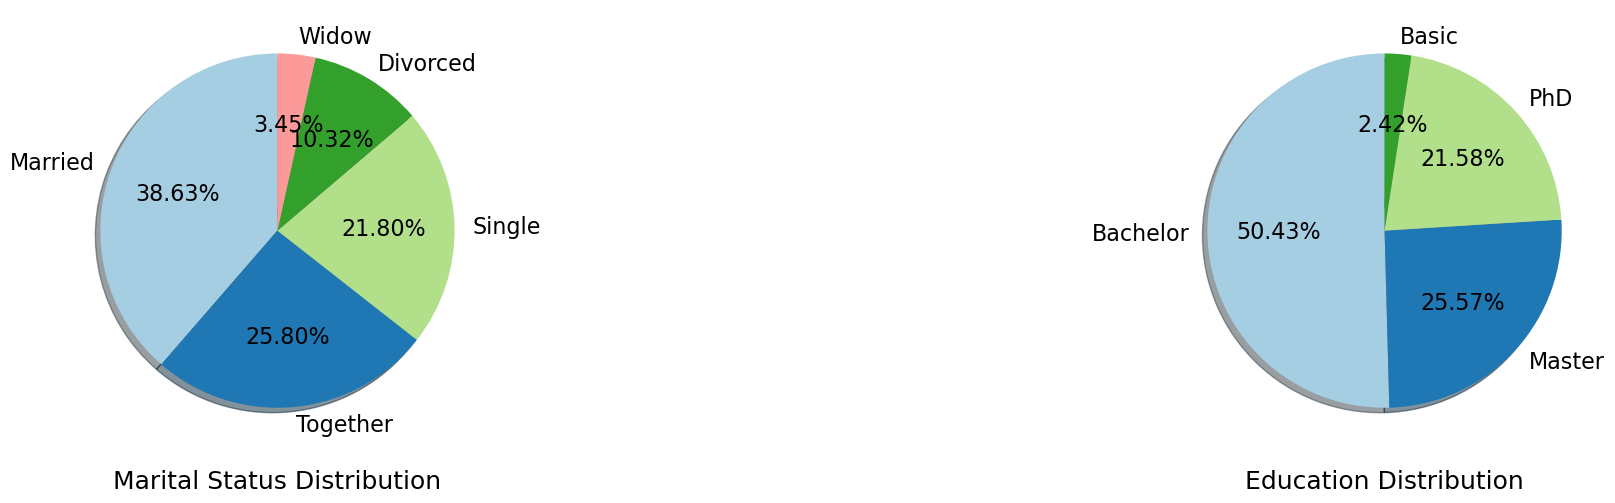

In [42]:
# visualizing Marital Status and Education Level to ascertain our customer distribution


# Count the occurrences of each category
marital_count = df_mkt['Marital_Status'].value_counts()

# Create a pie chart
fig, ax = plt.subplots(1,2, figsize = (20, 18))
ax[0].pie(marital_count, labels=marital_count.index, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 16}, shadow=True, colors=plt.cm.Paired.colors)
ax[0].set_title('Marital Status Distribution', y=-0.1, fontsize=18)

# Count the occurrences of each category
Education_count = df_mkt['Education'].value_counts()

# Create a pie chart
ax[1].pie(Education_count, labels=Education_count.index, autopct='%1.2f%%', startangle=90, textprops={'fontsize': 16}, shadow=True, colors=plt.cm.Paired.colors)
ax[1].set_title('Education Distribution', y=-0.1, fontsize=18)
plt.subplots_adjust(wspace = 1.5, hspace =0)
plt.show()


* A quick look of the customer distribution, we could see the most our customer(64%) are in relationships(Married(38.64%) or Together(25.85%)) and most(97%) are at least bachelor degrees with having (PhD(21.69%), Master(25.54%), Bchelor(50.36%))).

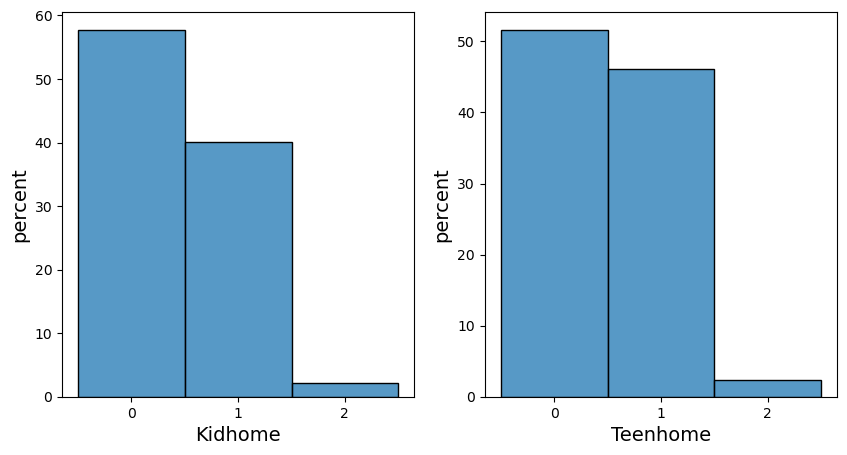

In [44]:
# visualizing to see the distribution of customers with kids and no kid

# Kid Home & Teen Home
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.histplot(data=df_mkt, x='Kidhome', stat="percent", discrete=True)
plt.xlabel('Kidhome', fontsize=14, color="black")
plt.ylabel('percent', fontsize=14, color="black")
plt.xticks([0, 1, 2])

plt.subplot(122)
sns.histplot(data=df_mkt, x='Teenhome', stat="percent",discrete=True)
plt.xlabel('Teenhome', fontsize=14, color="black")
plt.ylabel('percent', fontsize=14, color="black")
plt.xticks([0, 1, 2])
plt.show()

* Most customers have 1 kid/Teen or 0 kid/Teen at home, very few have 2 kids/Teens, and no one have kids/Teens over 2.

([<matplotlib.axis.XTick at 0x26acfe74d90>,
 [Text(0, 0, '0'), Text(1, 0, '1')])

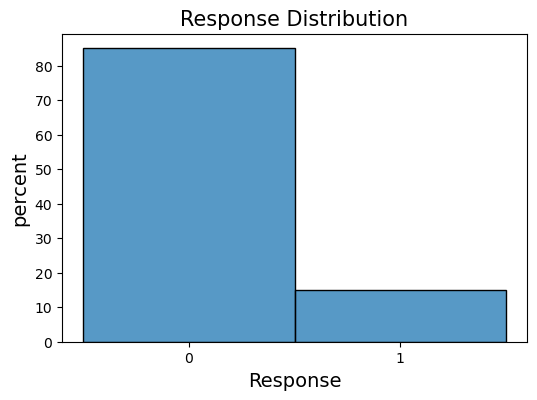

In [46]:
# Checking if our data is balance or unbalance, to ascertain how to treat the dataset, if its unbalance we will use smote

# Response Distribution
plt.figure(figsize=(6,4))
sns.histplot(data=df_mkt, x='Response', stat="percent", discrete=True)
plt.title('Response Distribution', fontsize=15, color='black')
plt.xlabel('Response', fontsize=14, color="black")
plt.ylabel('percent', fontsize=14, color="black")
plt.xticks([0, 1])

* According to Response, this is an unbalanced dataset, over 80% customers say no to the last campaign. So we will do a smote analysis to be sure of an accurate prediction.

### Now we want to explore more to know the category of customers that will respond to the marketing campaign.
* Education Response
* Marital Response
* Kid Home Response
* Teen Home Response

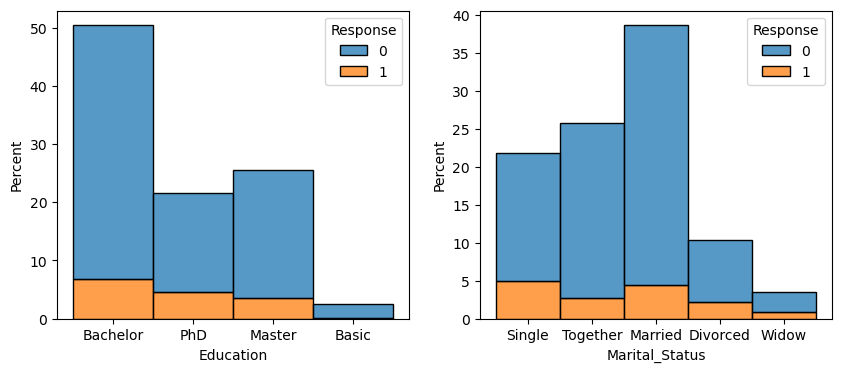

In [47]:
# Education Response
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df_mkt, x="Education", hue="Response", multiple="stack", stat="percent")

# Marital_Status Response
plt.subplot(122)
sns.histplot(data=df_mkt, x="Marital_Status", hue="Response",multiple="stack", stat="percent")
plt.show()

* Campaign acceptance rate in high education groups(Master and PhD) are higher than that in low education groups.
* Single people tend to say yes to the campaign more

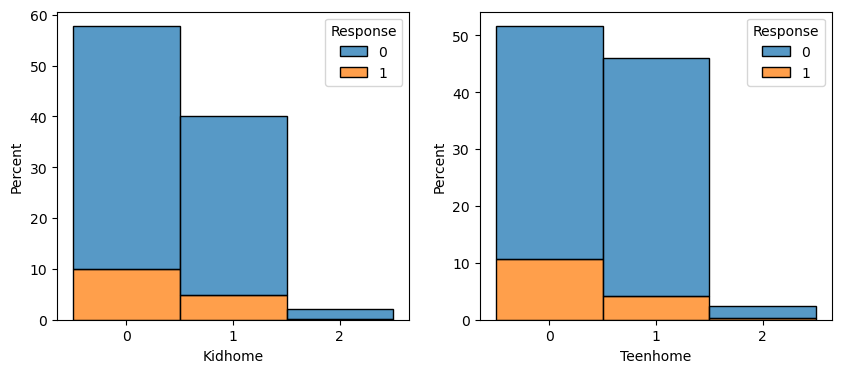

In [48]:
# Kid Home  Response
plt.figure(figsize=(10,4))
plt.subplot(121)
sns.histplot(data=df_mkt, x="Kidhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])

# Teen Home  Response
plt.subplot(122)
sns.histplot(data=df_mkt, x="Teenhome", hue="Response", multiple="stack", stat="percent", discrete=True)
plt.xticks([0, 1, 2])
plt.show()

* Customers with no kids and no teens at home are more likely to accept the offer in this campaign.

## To further the Exploratory analysis, I want to look at the correlation of Product preferences and purchases and the campaign response

In [50]:
# First need to create a new feature and create column for Product.

# Adding a new feature: Total Purchases
df_mkt['Total_Purchases'] = df_mkt[['MntFruits', 'MntMeatProducts', 'MntFishProducts', 
                                    'MntSweetProducts', 'MntGoldProds', 'MntWines']].sum(axis=1)

# Product Preferences
# Product purchases
product_columns = ['MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntWines']
product_names = ['Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'Wines']

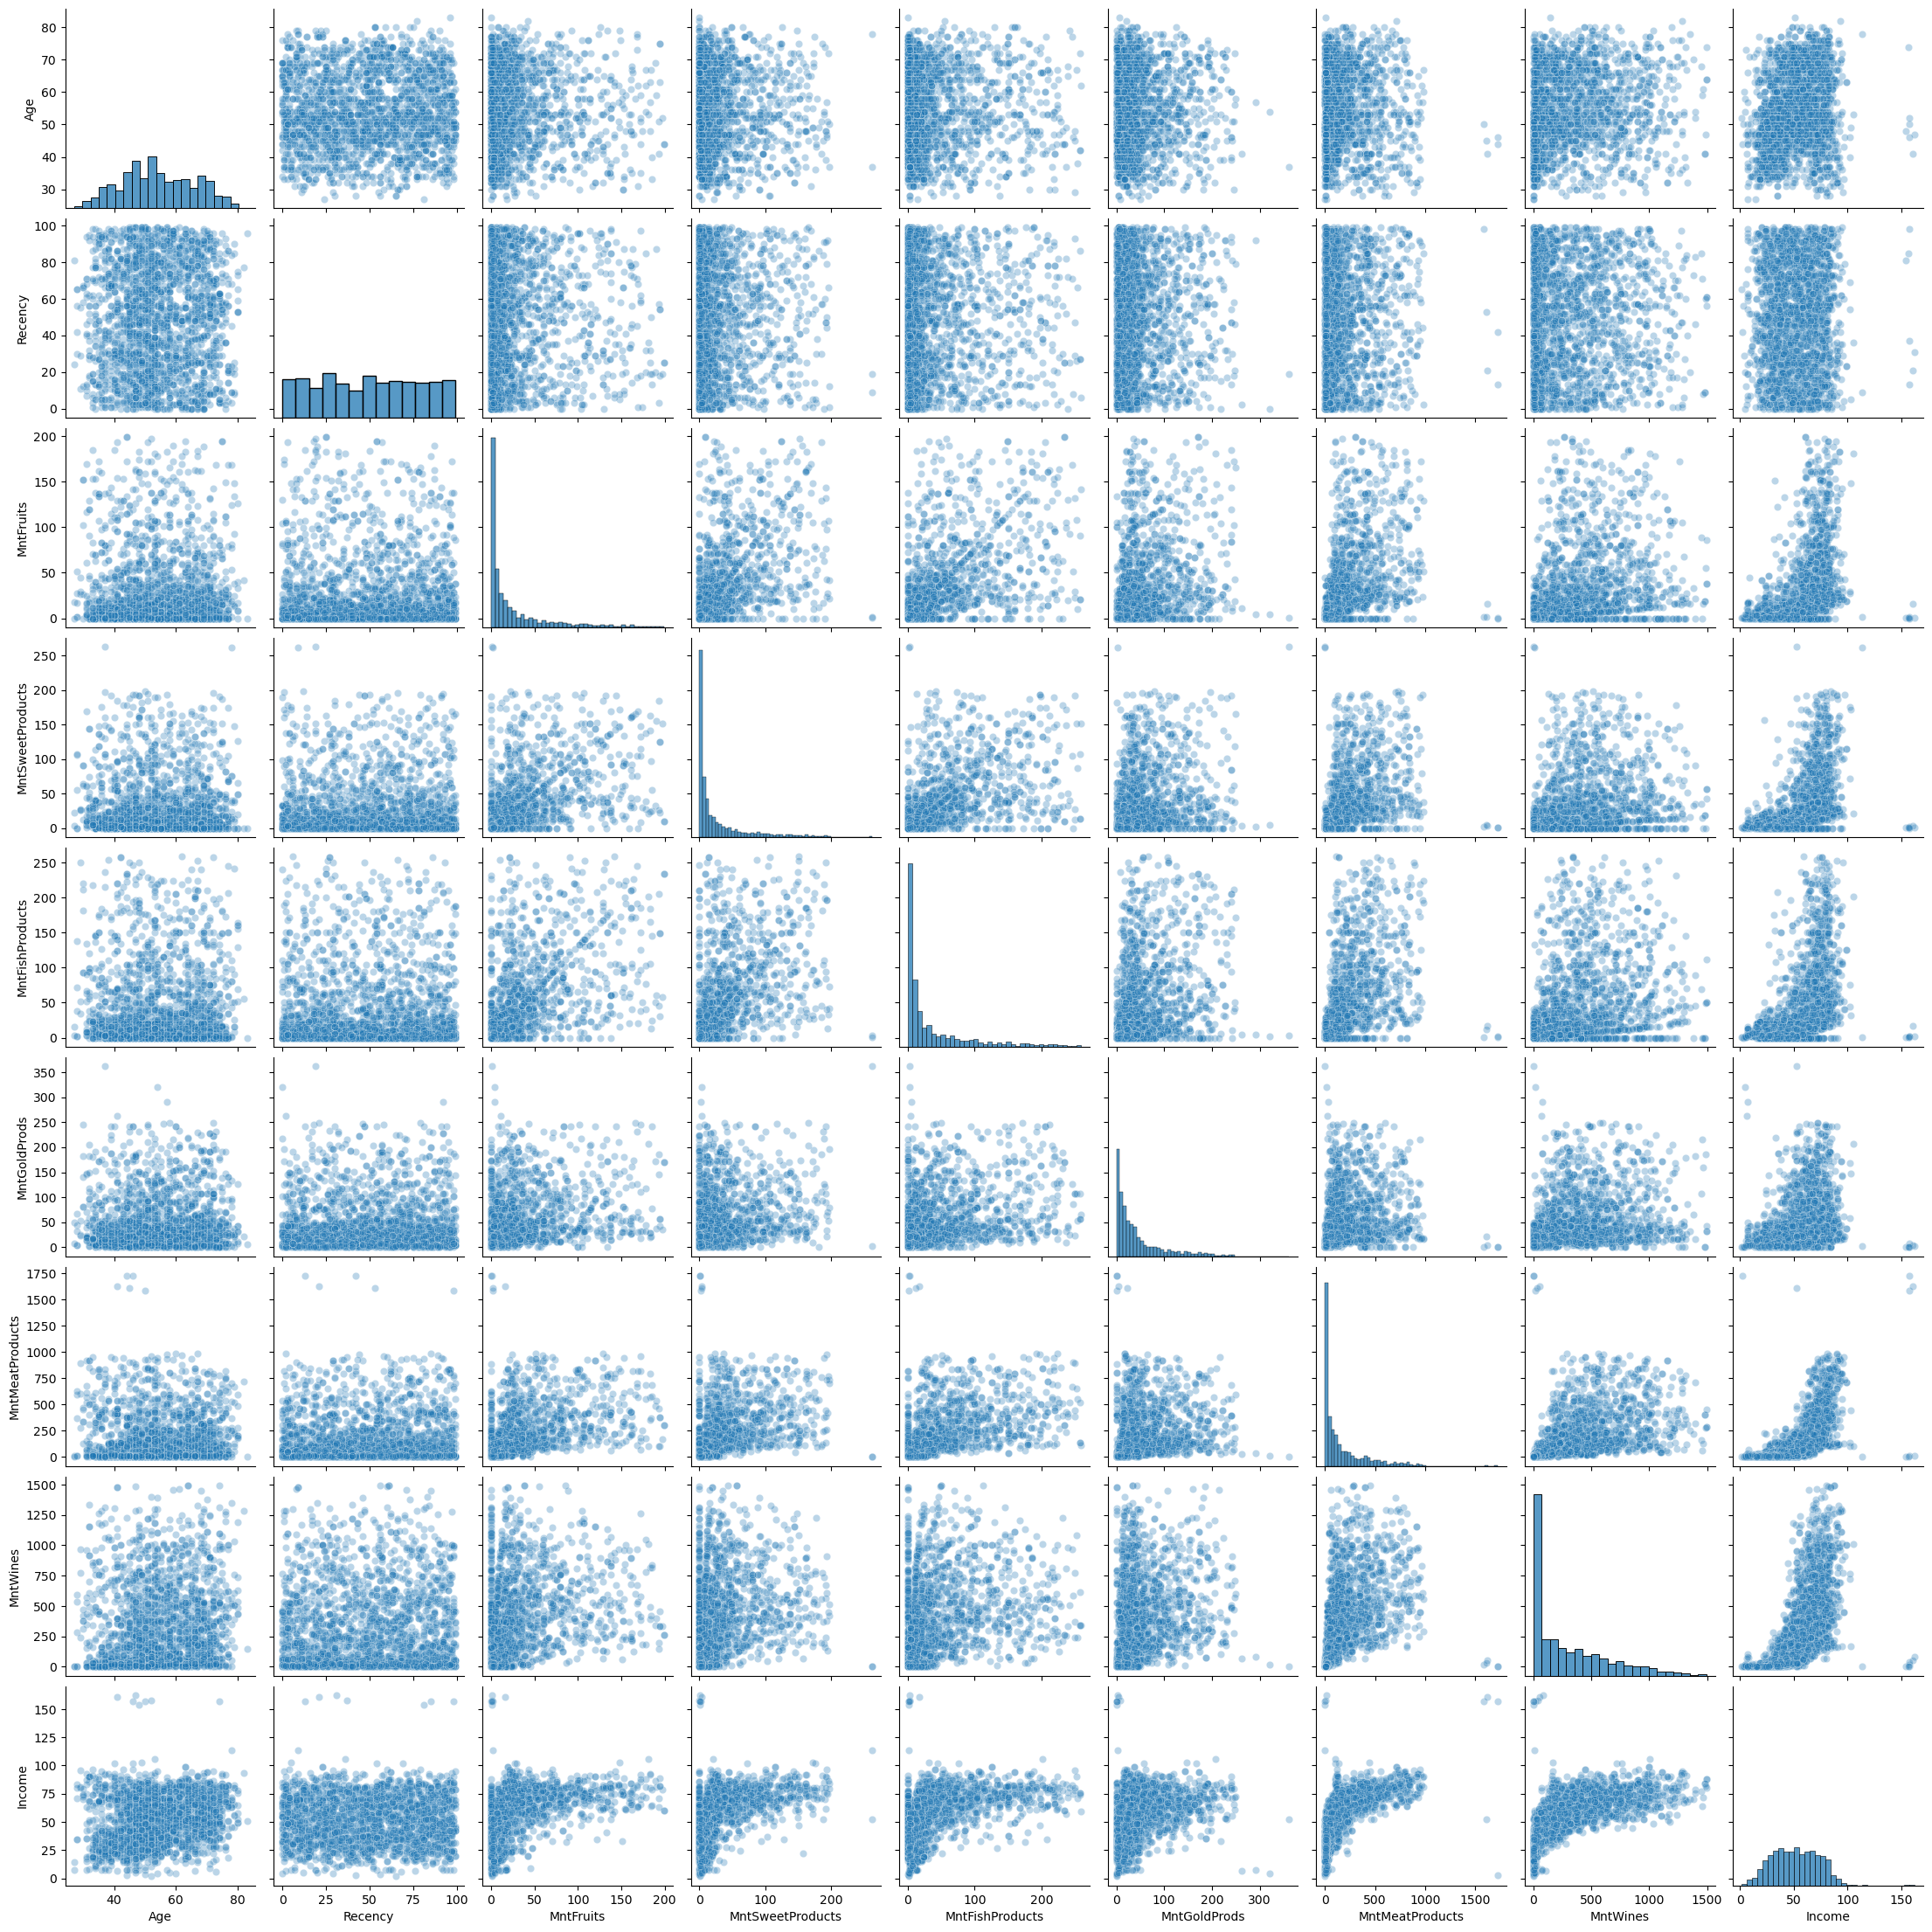

In [27]:
# Checking correlation using pairplot

NUMERICAL_FEATURES = ['Age', 'Recency', 'MntFruits', 
                      'MntSweetProducts', 'MntFishProducts', 'MntGoldProds', 
                      'MntMeatProducts', 'MntWines', 'Income']

sns.pairplot(data=df_mkt[NUMERICAL_FEATURES], 
             kind='scatter', plot_kws={'alpha':0.3})
plt.show()

* From the plot above, we could see tha these numerical variables do not have clear linear trend between each other.
* While Income might have log relationships with these product purchasing amount (say, Mntfruit, MntSweetProducts and etc.).

Income   Kidhome  Teenhome   Recency  MntWines  \
Income               1.000000 -0.510263  0.034376  0.007963  0.685944   
Kidhome             -0.510263  1.000000 -0.035339  0.007964 -0.496166   
Teenhome             0.034376 -0.035339  1.000000  0.016746  0.005047   
Recency              0.007963  0.007964  0.016746  1.000000  0.016321   
MntWines             0.685944 -0.496166  0.005047  0.016321  1.000000   
MntFruits            0.504859 -0.372442 -0.176117 -0.003717  0.388472   
MntMeatProducts      0.684170 -0.436901 -0.261171  0.023446  0.561886   
MntFishProducts      0.518381 -0.387404 -0.204177  0.001314  0.398956   
MntSweetProducts     0.518161 -0.370486 -0.162527  0.022796  0.385845   
MntGoldProds         0.383593 -0.349462 -0.020447  0.017168  0.386234   
NumDealsPurchases   -0.107140  0.221489  0.388293 -0.000638  0.011173   
NumWebPurchases      0.450579 -0.361982  0.155649 -0.010776  0.542136   
NumCatalogPurchases  0.693660 -0.502331 -0.110551  0.025226  0.634716   
NumStorePurchases    0.627943 -0.500192  0.050177  0.000771  0.642313   
NumWebVisitsMonth   -0.646426  0.447626  0.134636 -0.021850 -0.320287   
AcceptedCmp3        -0.015186  0.014739 -0.042949 -0.033095  0.062103   
AcceptedCmp4         0.217743 -0.161686  0.038680  0.018779  0.373491   
AcceptedCmp5         0.394258 -0.204918 -0.190383  0.000844  0.471949   
AcceptedCmp1         0.325288 -0.172435 -0.140426 -0.019367  0.354328   
AcceptedCmp2         0.104012 -0.081760 -0.015715 -0.001811  0.206031   
Complain            -0.027912  0.036336  0.007553  0.005361 -0.035974   
Response             0.160990 -0.080005 -0.154941 -0.198781  0.247280   
Age                  0.198889 -0.233894  0.363172  0.019396  0.162809   

                     MntFruits  MntMeatProducts  MntFishProducts  \
Income                0.504859         0.684170         0.518381   
Kidhome              -0.372442        -0.436901        -0.387404   
Teenhome             -0.176117        -0.261171        -0.204177   
Recency              -0.003717         0.023446         0.001314   
MntWines              0.388472         0.561886         0.398956   
MntFruits             1.000000         0.542030         0.594415   
MntMeatProducts       0.542030         1.000000         0.567813   
MntFishProducts       0.594415         0.567813         1.000000   
MntSweetProducts      0.567030         0.523329         0.579490   
MntGoldProds          0.389999         0.348727         0.422018   
NumDealsPurchases    -0.131792        -0.122242        -0.139263   
NumWebPurchases       0.296986         0.293502         0.293424   
NumCatalogPurchases   0.487274         0.723473         0.533969   
NumStorePurchases     0.463136         0.479983         0.459997   
NumWebVisitsMonth    -0.417405        -0.539183        -0.445729   
AcceptedCmp3          0.014945         0.018250         0.000302   
AcceptedCmp4          0.010363         0.102981         0.016797   
AcceptedCmp5          0.211996         0.372173         0.198112   
AcceptedCmp1          0.195351         0.310053         0.260866   
AcceptedCmp2         -0.009717         0.043060         0.002555   
Complain             -0.002813        -0.020750        -0.018842   
Response              0.125854         0.236548         0.111325   
Age                   0.013657         0.030729         0.042359   

                     MntSweetProducts  MntGoldProds  ...  NumStorePurchases  \
Income                       0.518161      0.383593  ...           0.627943   
Kidhome                     -0.370486     -0.349462  ...          -0.500192   
Teenhome                    -0.162527     -0.020447  ...           0.050177   
Recency                      0.022796      0.017168  ...           0.000771   
MntWines                     0.385845      0.386234  ...           0.642313   
MntFruits                    0.567030      0.389999  ...           0.463136   
MntMeatProducts              0.523329      0.348727  ...           0.479983   
MntFi

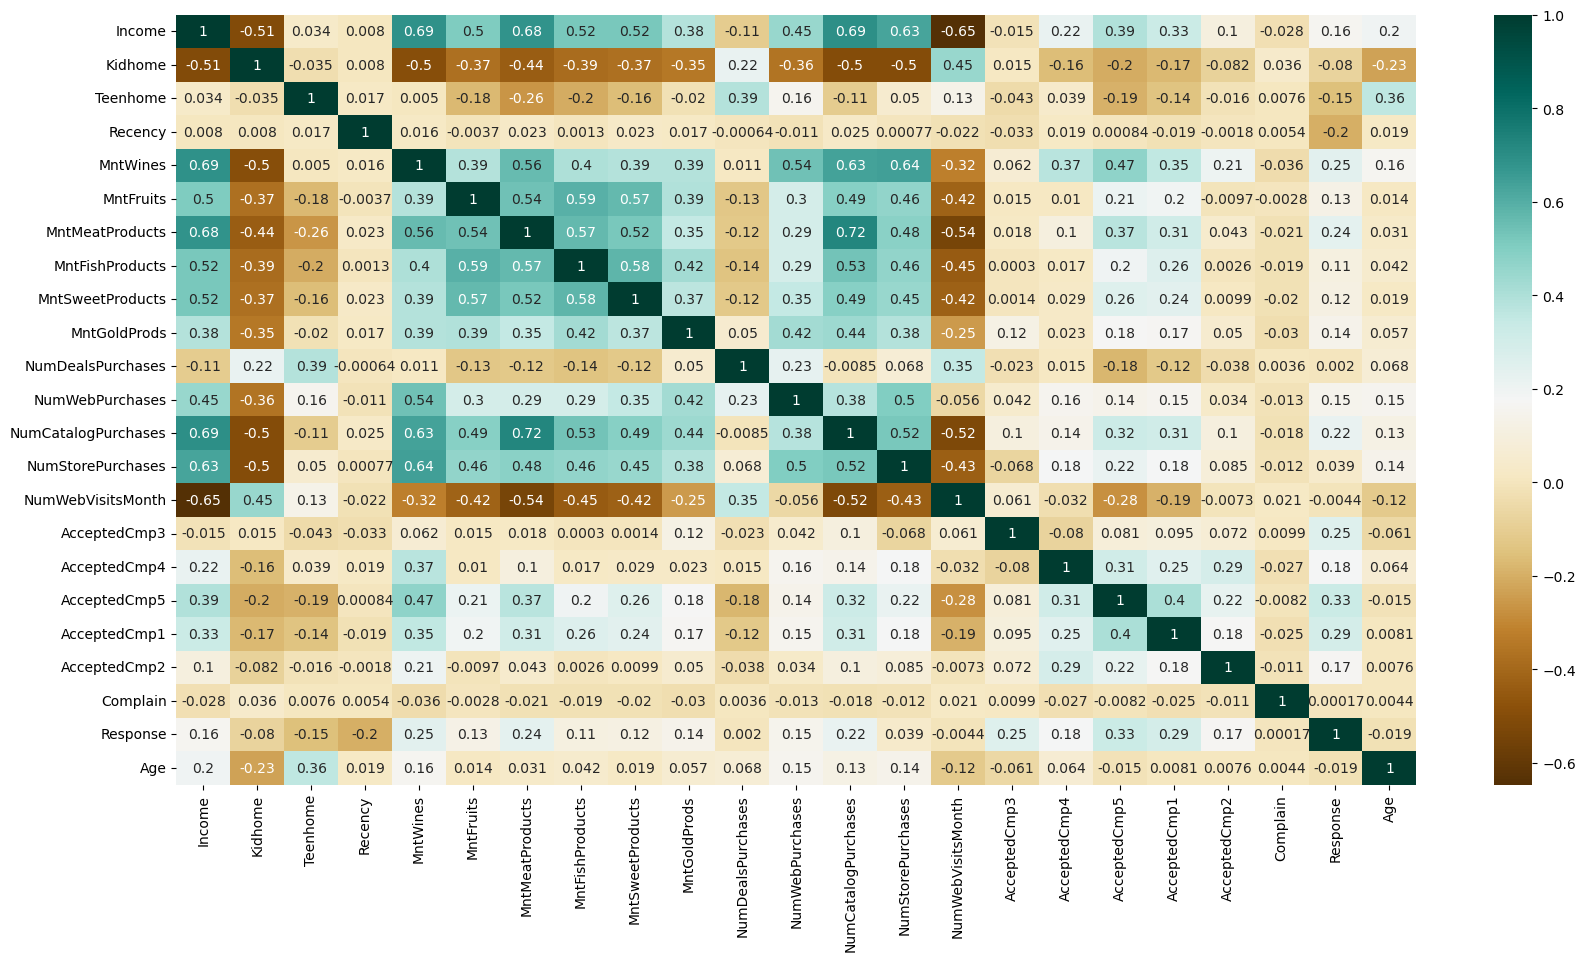

In [28]:
# Heat map among all numerical variables
plt.figure(figsize=(20,10))
c= df_mkt.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

# Model Predictions 

In [29]:
# Model libraries
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
from imblearn.under_sampling import NearMiss
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

# conda install -c conda-forge imbalanced-learn
from imblearn.over_sampling import SMOTE 

#### Before going further I will be picking the relevant data which are useful for the predication and classification models
- I will be picking relevant columns that includes;
['Recency', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Age', 'MntSweetProducts', 'AcceptedCmp5', 'NumWebVisitsMonth', 'AcceptedCmp3', 'MntFishProducts', 'MntFruits', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'Education', 'Response']

In [30]:
# New selected column
df_mkt_new = df_mkt.loc[:,['Recency', 'Income', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'Age', 'MntSweetProducts', 'AcceptedCmp5', 'NumWebVisitsMonth', 'AcceptedCmp3', 'MntFishProducts', 'MntFruits', 'NumStorePurchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases', 'AcceptedCmp1', 'Education', 'Response']]    


In [31]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, 
                           n_features=20, n_clusters_per_class=1, n_samples=1000, random_state=10)
print('Original dataset shape %s' % Counter(y))
# Original dataset shape Counter({1: 900, 0: 100})
sm = SMOTE(random_state = 42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({1: 900, 0: 100})
Resampled dataset shape Counter({0: 900, 1: 900})


In [32]:
# Display the dimensions of the dataset
df_mkt_new.shape

(2236, 19)

In [33]:
# Replace categorical variables to numeric values 
# Education have orders, so we change Basic-Phd to scale 0-3
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['Basic'], 0)
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['Bachelor'], 1)
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['Master'], 2)
df_mkt_new['Education'] = df_mkt_new['Education'].replace(['PhD'], 3)

# Change Marital_Status to dummies
df_mkt_new = pd.get_dummies(df_mkt_new, drop_first = True)
df_mkt_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2236 entries, 0 to 2239
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Recency              2236 non-null   int64  
 1   Income               2236 non-null   float64
 2   MntWines             2236 non-null   int64  
 3   MntMeatProducts      2236 non-null   int64  
 4   MntGoldProds         2236 non-null   int64  
 5   Age                  2236 non-null   int64  
 6   MntSweetProducts     2236 non-null   int64  
 7   AcceptedCmp5         2236 non-null   int64  
 8   NumWebVisitsMonth    2236 non-null   int64  
 9   AcceptedCmp3         2236 non-null   int64  
 10  MntFishProducts      2236 non-null   int64  
 11  MntFruits            2236 non-null   int64  
 12  NumStorePurchases    2236 non-null   int64  
 13  NumCatalogPurchases  2236 non-null   int64  
 14  NumWebPurchases      2236 non-null   int64  
 15  NumDealsPurchases    2236 non-null   i

In [34]:
df_mkt_new.head(10)

Recency  Income  MntWines  MntMeatProducts  MntGoldProds  Age  \
0       58  58.138       635              546            88   66   
1       38  46.344        11                6             6   69   
2       26  71.613       426              127            42   58   
3       26  26.646        11               20             5   39   
4       94  58.293       173              118            15   42   
5       16  62.513       520               98            14   56   
6       34  55.635       235              164            27   52   
7       32  33.454        76               56            23   38   
8       19  30.351        14               24             2   49   
9       68   5.648        28                6            13   73   

   MntSweetProducts  AcceptedCmp5  NumWebVisitsMonth  AcceptedCmp3  \
0                88             0                  7             0   
1                 1             0                  5             0   
2                21             0                  4             0   
3                 3             0                  6             0   
4                27             0                  5             0   
5                42             0                  6             0   
6                49             0                  6             0   
7                 1             0                  8             0   
8                 3             0                  9             0   
9                 1             0                 20             1   

   MntFishProducts  MntFruits  NumStorePurchases  NumCatalogPurchases  \
0              172         88                  4                   10   
1                2          1                  2                    1   
2              111         49                 10                    2   
3               10          4                  4                    0   
4               46         43                  6                    3   
5                0         42                 10                    4   
6               50         65                  7                    3   
7                3         10                  4                    0   
8                3          0                  2                    0   
9                1          0                  0                    0   

   NumWebPurchases  NumDealsPurchases  AcceptedCmp1  Education  Response  
0                8                  3             0          1         1  
1                1                  2             0          1         0  
2                8                  1             0          1         0  
3                2                  2             0          1         0  
4                5                  5             0          3         0  
5                6                  2             0          2         0  
6                7                  4             0          1         0  
7                4                  2             0          3         0  
8                3                  1             0          3         1  
9                1                  1             0          3         0

#### Data Preparation for Classification Models
* Choosing our Target variable
* Test_Train Split
* Logistic Regression Model
* Random Forest
* Smote to treat imbalance dataset
* Accuracy testing

In [35]:
# Target Variable id Customer's Reponse 

# First check the unique values in the Target Variable column 

unique_values = df_mkt_new['Response'].unique()

print(unique_values)

[1 0]


In [36]:
# Value count of the Target Variable

df_mkt_new.Response.value_counts()

0    1902
1     334
Name: Response, dtype: int64

In [37]:
# Remove the Targe Variable column 
X = df_mkt_new.drop("Response", axis = 1)    # Independent variables
y = df_mkt_new.Response                    # Dependent variable

In [38]:
print(X)

      Recency  Income  MntWines  MntMeatProducts  MntGoldProds  Age  \
0          58  58.138       635              546            88   66   
1          38  46.344        11                6             6   69   
2          26  71.613       426              127            42   58   
3          26  26.646        11               20             5   39   
4          94  58.293       173              118            15   42   
...       ...     ...       ...              ...           ...  ...   
2235       46  61.223       709              182           247   56   
2236       56  64.014       406               30             8   77   
2237       91  56.981       908              217            24   42   
2238        8  69.245       428              214            61   67   
2239       40  52.869        84               61            21   69   

      MntSweetProducts  AcceptedCmp5  NumWebVisitsMonth  AcceptedCmp3  \
0                   88             0                  7             0   
1

In [39]:
y.value_counts()

0    1902
1     334
Name: Response, dtype: int64

In [40]:
#### Train_Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

### Logistic Regression

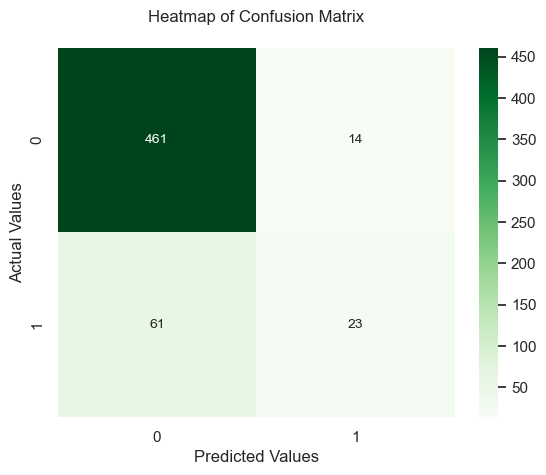

In [63]:
# Create an object by calling a method LogisticRegression()
lr = LogisticRegression()

# Train the model by calling a fit() method
lr.fit(X_train, y_train)

# Predict the values
y_pred = lr.predict(X_test)

# Call and display confusion matrix results
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

In [42]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Accuracy and recall based on Logistic regression on imbalanced dataset

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.87
Recall: 0.27


In [43]:
from sklearn.metrics import classification_report, confusion_matrix


sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.883142  0.970526  0.924774       475
           1   0.621622  0.273810  0.380165        84

    accuracy                       0.865832       559
   macro avg   0.752382  0.622168  0.652470       559
weighted avg   0.843844  0.865832  0.842937       559

[[461  14]
 [ 61  23]]


Predicted    0   1  All
Actual                 
0          461  14  475
1           61  23   84
All        522  37  559

In [44]:
# SMOTE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

np.bincount(y_train)

array([1427, 1427], dtype=int64)

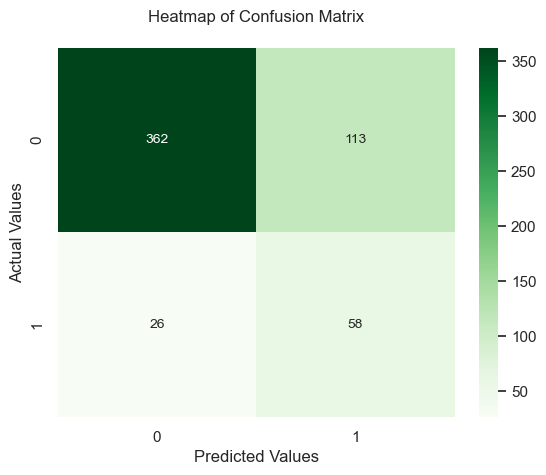

In [45]:
# using smote bincount to Logistic regression, to see how accurate it will be after smote analysis

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

In [46]:
# Accuracy and recall based on Logistic regression on smote dataset

# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.75
Recall: 0.69


In [47]:
from sklearn.metrics import classification_report, confusion_matrix


sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.932990  0.762105  0.838934       475
           1   0.339181  0.690476  0.454902        84

    accuracy                       0.751342       559
   macro avg   0.636085  0.726291  0.646918       559
weighted avg   0.843759  0.751342  0.781226       559

[[362 113]
 [ 26  58]]


Predicted    0    1  All
Actual                  
0          362  113  475
1           26   58   84
All        388  171  559

### Random Forest

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a RandomForest Classifier
clf_RF = RandomForestClassifier(n_estimators=300, random_state = 1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [49]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.88
Recall: 0.35


In [50]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.894231  0.978947  0.934673       475
           1   0.743590  0.345238  0.471545        84

    accuracy                       0.883721       559
   macro avg   0.818910  0.662093  0.703109       559
weighted avg   0.871594  0.883721  0.865080       559

[[465  10]
 [ 55  29]]


Predicted    0   1  All
Actual                 
0          465  10  475
1           55  29   84
All        520  39  559

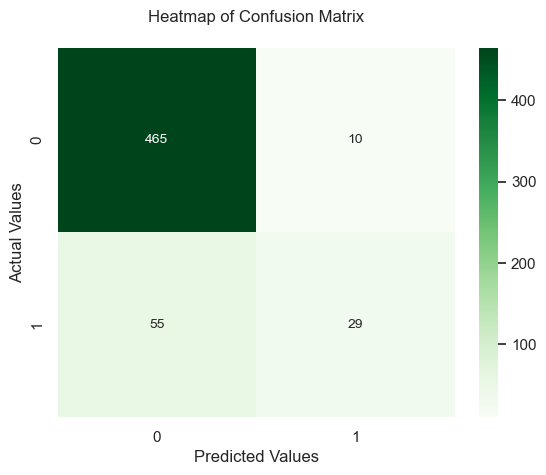

In [51]:
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

smt = SMOTE()

X_train, y_train = smt.fit_resample(X_train, y_train)

In [53]:
#Create a RandomForest Classifier on smote

clf_RF = RandomForestClassifier(n_estimators=300, random_state = 1)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf_RF.fit(X_train, y_train)

y_pred = clf_RF.predict(X_test)

In [54]:
# Rounded upto 2 decimal places
print( "Accuracy: {:.2f}".format(metrics.accuracy_score(y_test, y_pred)) )

recall = recall_score(y_test, y_pred)
print("Recall: {:.2f}".format(recall))

Accuracy: 0.87
Recall: 0.61


In [55]:
sk_report = classification_report(
    digits=6,
    y_true=y_test, 
    y_pred=y_pred
)
print(sk_report)

conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'], margins=True)

              precision    recall  f1-score   support

           0   0.929638  0.917895  0.923729       475
           1   0.566667  0.607143  0.586207        84

    accuracy                       0.871199       559
   macro avg   0.748152  0.762519  0.754968       559
weighted avg   0.875094  0.871199  0.873010       559

[[436  39]
 [ 33  51]]


Predicted    0   1  All
Actual                 
0          436  39  475
1           33  51   84
All        469  90  559

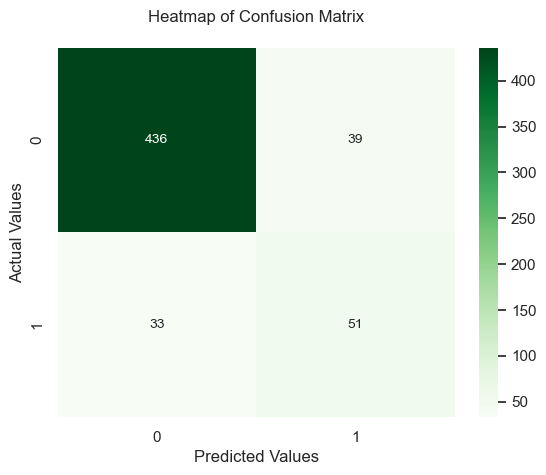

In [56]:
matrix_confusion = confusion_matrix(y_test, y_pred)

ax = sns.heatmap(matrix_confusion, annot=True,annot_kws={"size": 10}, fmt='g', cmap='Greens' )
ax.set(title="Heatmap of Confusion Matrix\n",
      xlabel="Predicted Values",
      ylabel="Actual Values");
sns.set(font_scale=1)

### Cross Validation 
* Let's now build and evaluate the final model, i.e. the model with highest test accuracy.

In [57]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

In [58]:
models = []
models.append(('RNF', RandomForestClassifier()))
models.append(('LR', LogisticRegression()))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify=y)

In [61]:
results = []
names = []
for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=0, shuffle=True)
	cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

RNF: 0.869996 (0.008909)
LR: 0.858658 (0.018031)


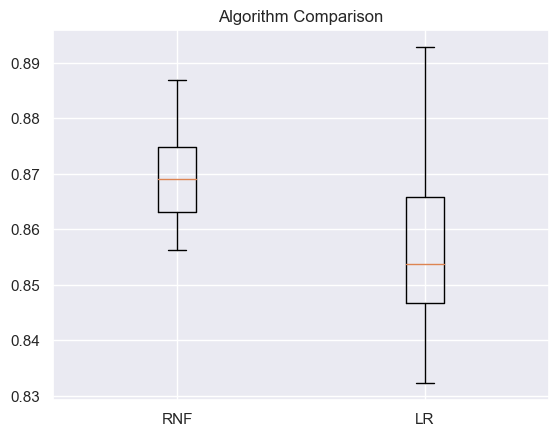

In [62]:
from matplotlib import pyplot

pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

## Conclusion
* In this report, I have focused on  analyzing the marketing response dataset of customers after marketing campaigns were carried out. The project successfully applied project management methodology to analyze a marketing campaign dataset. Key findings included the effectiveness of SMOTE in addressing imbalanced data and the superior performance of the Random Forest model over Logistic Regression. The insights gained can guide future marketing strategies to target potential customers more effectively. Using the Random Forrest classifier, I have been able to predict with 88% accuracy that customers are likely to response to the marketing campaigns in future but however, I am now entering the evaluation stage of the CRISP DM model which means we may have to re-visit some of the earlier steps to obtain confidence in our predictions.

## References
* Kenan Guan .(2021) ‘Customer_Response_Predict & Personality_Analysis’  Available at: https://www.kaggle.com/code/cainanguan/customer-response-predict-   personality-analysis
(Accessed: 10 December 2023)

* Menduni, G., Zifarelli, A., Sampaolo, A., Patimisco, P., Giglio, M., Amoroso, N., Wu, H., Dong, L.,   
                   Bellotti, R. and Spagnolo, V., 2022. High-concentration methane and ethane 
                   QEPAS detection employing partial least squares regression to filter out energy    
                    relaxation dependence on gas matrix composition. Photoacoustics, 26, p.100349.  

* Geron, A.(2019) Hands-n Machine Learning with Scikit-Learn,Keras and TensorFlow,
                  United State of America: O’Reilly Media, Inc.
              
